# Interpretability with Shapley values

The following notebook introduces shapley values for global and local interpretability of the produced machine learning model for this use case.

In [1]:
# Base libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import shap

# Custom library for preprocessing
import src.feature_engineering as fe

In [4]:
df = pd.read_csv('data/Train_bronze.csv') #Train Dataset
kept_columns = ['Ang', 'FrL', 'FrG', 'X_LM_2', 'Eo', 'Flow_label'] #Kept Columns (from SFFS)
df = fe.bronze_to_gold(df)[kept_columns]
df.head()

,Ang,FrL,FrG,X_LM_2,Eo,Flow_label
0,70.0,1.977684,0.167038,90.943470,87.456055,2
1,15.0,3.375242,0.027241,759.858750,87.456055,2
2,-1.0,3.233300,0.001111,17270.115534,87.456055,1
3,0.0,1.237211,0.121114,571.995542,174.589416,2
4,0.0,0.394137,1.052936,0.419920,1513.924625,0


In [5]:
target_col = 'Flow_label'
features_columns = [c for c in df.columns if c not in [target_col]]
X, y = df[features_columns].values, df[target_col].values

In [6]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(X, y)

[22:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [7]:
# Initialize SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## Summary plot

Of the selected features, lets visualize the most impactful ones in determining the flow regimes (for each class)

In [8]:
di = {'A': 0, 'DB':1, 'I':2, 'SW':3, 'SS':4, 'B':5}
class_names = list(di.keys())

In [10]:
class_names

['A', 'DB', 'I', 'SW', 'SS', 'B']

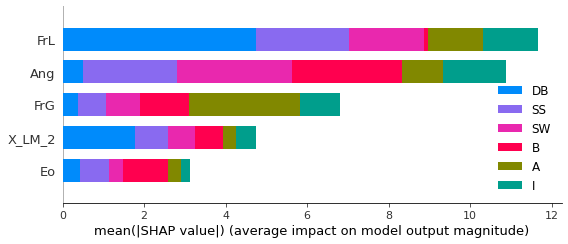

In [9]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=features_columns, class_names=class_names)

### Lets visualize the global interpretability for each class

This will show the most important dimensionless set of features to determine a given flow regime

Gloabl Interpretability for: A


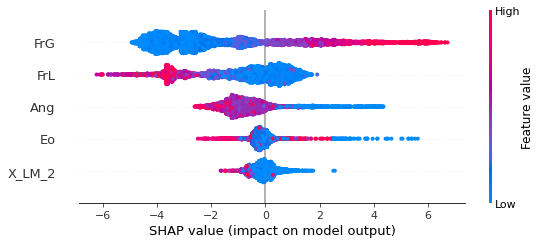

Gloabl Interpretability for: DB


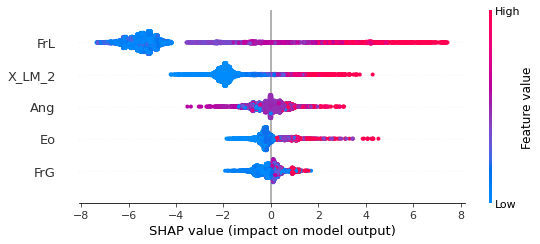

Gloabl Interpretability for: I


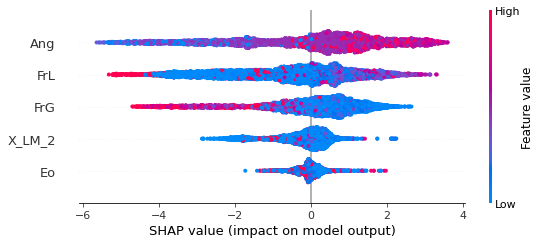

Gloabl Interpretability for: SW


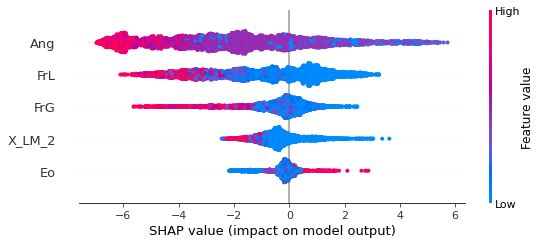

Gloabl Interpretability for: SS


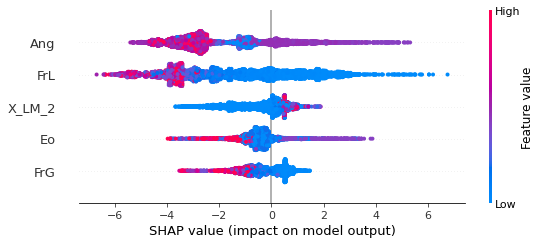

Gloabl Interpretability for: B


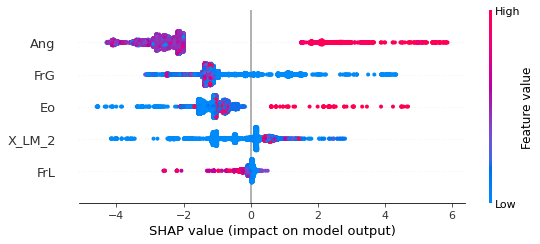

In [16]:
for i, c in enumerate(class_names):
    print(f'Gloabl Interpretability for: {c}')
    shap.summary_plot(shap_values[i], X, feature_names = features_columns)

### Add Local Interpretability

One extremely powerfull propery of shapely values is that they can be used for ```local``` interpretability, meaning that we can understand what caused the model to produce a certain output

In [15]:
i=42
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X[i], feature_names=features_columns)